In [1]:
import csv
city_rental = []
with open('Data/City_Zri_AllHomes.csv', 'r') as csvfile:
    r = csv.reader(csvfile)
    for row in r:
        city_rental.append(row)

In [2]:
zip_rental = []
with open('Data/Zip_Zri_AllHomes.csv', 'r') as csvfile:
    r = csv.reader(csvfile)
    for row in r:
        zip_rental.append(row)

In [3]:
zip_home = []
with open('Data/Zip_Zhvi_AllHomes.csv', 'r') as csvfile:
    r = csv.reader(csvfile)
    for row in r:
        zip_home.append(row)

In [4]:
city_home = []
with open('Data/City_Zhvi_AllHomes.csv', 'r') as csvfile:
    r = csv.reader(csvfile)
    for row in r:
        city_home.append(row)

In [5]:
zip_home_keys = zip_home[0]
city_rental_keys = city_rental[0]
zip_rental_keys = zip_rental[0]
city_home_keys = city_home[0]

months = city_rental_keys[-70:]
print(months)

attr_zip = zip_home_keys[0:7]
attr_city = city_home_keys[:6]
print(attr_zip)
print(attr_city)

keys_zip = attr_zip + months
keys_city = attr_city + months

print (keys_zip)
print (keys_city)

['2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01']
['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank']
['RegionID', 'RegionName', 'State', 'Metro', 'CountyName', 'SizeRank']
['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 

In [6]:
def formls(keys, content, index):
    ls = []
    print(len(content))
    for line in content:
        temp= {}
        for key, val in zip(keys[:index], (line[:index])):
            temp[key] = val
        for key, val in zip(keys[index:], (line[-70:])):
            temp[key] = val
        ls.append(temp)
    return ls

In [7]:
dataset = {}
dataset['zip_home'] = formls(keys_zip, zip_home[1:], 7)
dataset['zip_rental'] = formls(keys_zip, zip_rental[1:], 7)
dataset['city_rental'] = formls(keys_city, city_rental[1:],6)
dataset['city_home'] = formls(keys_city, city_home[1:],6)

15327
15913
13123
13048


In [8]:
######## convert string to floats for the rent,
######## and fill in the empty data with previous closest non 0 value
for i in dataset:
    ls = dataset[i]
    for d in ls:
        for m in months:
            if d[m]=='':
                #print([months.index(m)])
                d[m] = float(d[months[months.index(m)-1]])
            else:
                d[m] = float(d[m])

In [15]:
sd_areas = [(i['City'],i['CountyName'],i['RegionName'],i['Metro']) for i in dataset['zip_home'] if i['City'] == 'San Diego']

In [16]:
sd_areas

[('San Diego', 'San Diego', '92109', 'San Diego'),
 ('San Diego', 'San Diego', '92126', 'San Diego'),
 ('San Diego', 'San Diego', '92101', 'San Diego'),
 ('San Diego', 'San Diego', '92115', 'San Diego'),
 ('San Diego', 'San Diego', '92104', 'San Diego'),
 ('San Diego', 'San Diego', '92154', 'San Diego'),
 ('San Diego', 'San Diego', '92105', 'San Diego'),
 ('San Diego', 'San Diego', '92122', 'San Diego'),
 ('San Diego', 'San Diego', '92117', 'San Diego'),
 ('San Diego', 'San Diego', '92128', 'San Diego'),
 ('San Diego', 'San Diego', '92130', 'San Diego'),
 ('San Diego', 'San Diego', '92037', 'San Diego'),
 ('San Diego', 'San Diego', '92103', 'San Diego'),
 ('San Diego', 'San Diego', '92114', 'San Diego'),
 ('San Diego', 'San Diego', '92129', 'San Diego'),
 ('San Diego', 'San Diego', '92111', 'San Diego'),
 ('San Diego', 'San Diego', '92116', 'San Diego'),
 ('San Diego', 'San Diego', '92127', 'San Diego'),
 ('San Diego', 'San Diego', '92102', 'San Diego'),
 ('San Diego', 'San Diego', '92

In [47]:
#############check the rent change over months among recent years ############
import numpy as np
zip_month_average = []
for month in months:
    #month_average[month] = np.mean([i[month] for i in data if i['CountyName'] != 'San Diego'])
    zip_month_average.append(np.mean([i[month] for i in dataset['zip_home'] if i['City'] != 'San Diego']))

In [48]:
sd =[92101,92037, 92109, 92122]

In [49]:
sd_info = [d for d in dataset['zip_home'] if d['City'] == 'San Diego' and int(d['RegionName']) in sd]
sd_month_ = [[d[month] for month in months] for d in sd_info ]
sd_index = [dataset['zip_home'].index(d) for d in sd_info]

[188452.69077355653, 188842.47041129929, 189365.97789838488, 190058.07885960897, 190730.8376381351, 191393.08834107107, 192083.63957366114, 192893.80762440333, 193768.5150068659, 194652.03687961813, 195576.22441639967, 196741.64650493689, 198096.08317530897, 199545.96874386974, 201029.86333616686, 202457.56228339762, 203624.3248545086, 204700.72582227163, 205597.56751454913, 206363.16615444975, 207104.28300529654, 207912.42398482966, 208732.01464722422, 209612.27358922383, 210521.33002027072, 211428.98711828943, 212356.59452036879, 213256.35911855096, 214106.53893938405, 214845.69410841563, 215538.67782645655, 216200.38579742366, 216855.07748643169, 217601.58896227033, 218626.08382920289, 219842.94121493495, 221114.01294709998, 222358.81775975937, 223568.87464853202, 224732.51814555679, 225852.3769044661, 226861.45295233114, 227783.64611260055, 228667.50801020075, 229557.60805597331, 230506.93781468645, 231552.41613810239, 232703.38063166154, 233880.54665533249, 234905.76734453673, 235

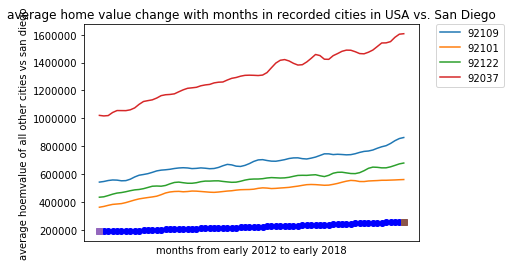

low: 2012-04 188452.690774
high: 2018-01 258247.610018


In [50]:
import matplotlib.pyplot as plt
import numpy as np
plt.title('average home value change with months in recorded cities in USA vs. San Diego')
r = zip_month_average
print(r)
x = range(len(months))
plt.plot(x,r,'bo')
legend = []
for i in sd_month_:
    pid = sd_info[sd_month_.index(i)]['RegionName']
    plt.plot(x,i,label=pid)
    legend.append(pid)
#plt.legend(handles = legend)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
i_min = r.index(min(r))
i_max = r.index(max(r))
plt.plot(i_min, min(r), marker = 's')
plt.plot(i_max, max(r), marker = 's')
frame = plt.gca()
### hide the x values
frame.axes.get_xaxis().set_ticks([])
plt.xlabel("months from early 2012 to early 2018")
plt.ylabel("average hoemvalue of all other cities vs san diego")
plt.show()
print("low: %s %s"%(months[i_min], r[i_min]))
print("high: %s %s"%(months[i_max], r[i_max]))
######################
#for san diego, the data from 2012 to end of 2014, which appears all the same on the graph
#as we select the previous rent to replace the missing data

In [25]:
#### from the graph, we can see the drop from 2010 to early 2013#########

In [56]:
counties =[(d['CountyName'], d['RegionName'],d['Metro'], d['City']) for d in dataset['zip_rental'] if d['CountyName'] == 'New York City' or d['CountyName'] == 'San Diego' or d['CountyName'] == 'San Francisco' or d['CountyName'] == 'Santa Clara']  

In [57]:
counties

[('San Francisco', '94109', 'San Francisco', 'San Francisco'),
 ('San Francisco', '94110', 'San Francisco', 'San Francisco'),
 ('San Diego', '91910', 'San Diego', 'Chula Vista'),
 ('San Diego', '92109', 'San Diego', 'San Diego'),
 ('San Diego', '91911', 'San Diego', 'Chula Vista'),
 ('San Diego', '92126', 'San Diego', 'San Diego'),
 ('San Diego', '92021', 'San Diego', 'El Cajon'),
 ('San Diego', '92101', 'San Diego', 'San Diego'),
 ('Santa Clara', '95123', 'San Jose', 'San Jose'),
 ('San Francisco', '94122', 'San Francisco', 'San Francisco'),
 ('Santa Clara', '95035', 'San Jose', 'Milpitas'),
 ('San Diego', '92115', 'San Diego', 'San Diego'),
 ('San Diego', '92104', 'San Diego', 'San Diego'),
 ('Santa Clara', '95051', 'San Jose', 'Santa Clara'),
 ('San Diego', '92154', 'San Diego', 'San Diego'),
 ('Santa Clara', '95014', 'San Jose', 'Cupertino'),
 ('San Diego', '92105', 'San Diego', 'San Diego'),
 ('Santa Clara', '94087', 'San Jose', 'Sunnyvale'),
 ('San Francisco', '94112', 'San Franc

In [26]:
new_data = []
for i in counties:
    temp = [d for d in data if d['CountyName'] == i]
    size = sum([int(d['SizeRank']) for d in temp])/len(temp)
    rent = sum([d[months[-1]] for d in temp])/len(temp)
    new_data.append({'CountyName': i, 'SizeRank': size, 'Rent': rent})

In [27]:
new_data

[{'CountyName': 'Grafton', 'Rent': 1448.7, 'SizeRank': 8859.3},
 {'CountyName': 'Grundy', 'Rent': 1390.0, 'SizeRank': 8067.6},
 {'CountyName': 'De Witt', 'Rent': 1212.5, 'SizeRank': 5597.0},
 {'CountyName': 'Yakima', 'Rent': 1098.8, 'SizeRank': 6089.533333333334},
 {'CountyName': 'Uintah', 'Rent': 929.0, 'SizeRank': 8340.5},
 {'CountyName': 'Pearl River', 'Rent': 1154.0, 'SizeRank': 3367.6666666666665},
 {'CountyName': 'Todd', 'Rent': 846.0, 'SizeRank': 6831.0},
 {'CountyName': 'Harmon', 'Rent': 662.0, 'SizeRank': 8765.0},
 {'CountyName': 'Patrick', 'Rent': 1032.0, 'SizeRank': 9550.25},
 {'CountyName': 'Forsyth', 'Rent': 1229.3, 'SizeRank': 6035.9},
 {'CountyName': 'Creek', 'Rent': 832.375, 'SizeRank': 10823.25},
 {'CountyName': 'Sussex',
  'Rent': 1670.7837837837837,
  'SizeRank': 6298.540540540541},
 {'CountyName': 'Mecklenburg', 'Rent': 1418.4, 'SizeRank': 4027.4},
 {'CountyName': 'Isabella', 'Rent': 939.0, 'SizeRank': 8448.5},
 {'CountyName': 'Clackamas',
  'Rent': 2044.77272727272

In [20]:
names =['Santa Clara', 'San Diego', 'New York', 'San Francisco']
for name in names:
    print ([(d['Metro'],d['RegionName'],d['CountyName']) for d in data if d['CountyName'] == name or d['Metro'] == name] or d['RegionName'] == name)

[('San Jose', 'San Jose', 'Santa Clara'), ('San Jose', 'Sunnyvale', 'Santa Clara'), ('San Jose', 'Santa Clara', 'Santa Clara'), ('San Jose', 'Mountain View', 'Santa Clara'), ('San Jose', 'Palo Alto', 'Santa Clara'), ('San Jose', 'Milpitas', 'Santa Clara'), ('San Jose', 'Gilroy', 'Santa Clara'), ('San Jose', 'Cupertino', 'Santa Clara'), ('San Jose', 'Hollister', 'San Benito'), ('San Jose', 'Campbell', 'Santa Clara'), ('San Jose', 'Los Gatos', 'Santa Clara'), ('San Jose', 'Morgan Hill', 'Santa Clara'), ('San Jose', 'Saratoga', 'Santa Clara'), ('San Jose', 'Los Altos', 'Santa Clara'), ('San Jose', 'Alum Rock', 'Santa Clara'), ('San Jose', 'Stanford', 'Santa Clara'), ('San Jose', 'East Foothills', 'Santa Clara'), ('San Jose', 'Los Altos Hills', 'Santa Clara'), ('San Jose', 'San Martin', 'Santa Clara'), ('San Jose', 'Burbank', 'Santa Clara'), ('San Jose', 'Cambrian Park', 'Santa Clara'), ('San Jose', 'San Juan Bautista', 'San Benito'), ('San Jose', 'Monte Sereno', 'Santa Clara'), ('San Jose

2018-01
1232
[{'CountyName': 'San Diego', 'SizeRank': 4020.457142857143, 'Rent': 3127.3714285714286}]
[{'CountyName': 'Santa Clara', 'SizeRank': 2968.090909090909, 'Rent': 4647.727272727273}]
[{'CountyName': 'San Francisco', 'SizeRank': 13.0, 'Rent': 4205.0}]
[{'CountyName': 'Queens', 'SizeRank': 1.0, 'Rent': 2390.0}]


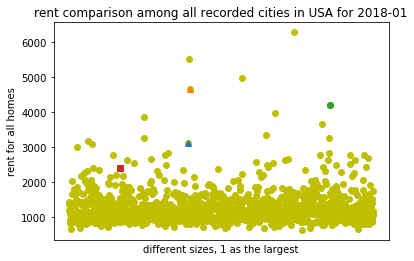

In [35]:
################# looking into details of the cities##############
### does the size of the region matters?
#### pick two months month and plot size against rent
selected_month1 = months[-1]
#selected_month2 = months[-10]
#selected_month3 = months[0]
print("%s" %(selected_month1))
sizes = [d['SizeRank'] for d in new_data]
rent = [d['Rent'] for d in new_data]
print(len(rent))
#rent2 = [d[selected_month2] for d in data]
#print(len(rent2))
#rent3 = [float(d[selected_month3]) for d in data]
#print(len(rent3))

sd = [d for d in new_data if d['CountyName'] == 'San Diego']
sc = [d for d in new_data if d['CountyName'] == 'Santa Clara']
sf = [d for d in new_data if d['CountyName'] == 'San Francisco']
queens = [d for d in new_data if d['CountyName'] == 'Queens']
print (sd)
print (sc)
print (sf)
print (queens)
#plt.plot(rent3, 'bs')
#plt.plot(rent2, 'g^')
plt.plot(rent, 'yo')


markers_on = [sd[0]['SizeRank'],sc[0]['SizeRank'],sf[0]['SizeRank'],queens[0]['SizeRank']] ## for san diego
plt.plot(sizes.index(markers_on[0]),rent[new_data.index(sd[0])],  marker = '^')
plt.plot(sizes.index(markers_on[1]),rent[new_data.index(sc[0])],  marker = '^')
plt.plot(sizes.index(markers_on[2]),rent[new_data.index(sf[0])],  marker = 'o')
plt.plot(sizes.index(markers_on[3]),rent[new_data.index(queens[0])],  marker = 's')

plt.title('rent comparison among all recorded cities in USA for %s'%selected_month1)
x = np.array(range(len(sizes)))
plt.xticks(x, sizes)
frame = plt.gca()
### hide the x values
frame.axes.get_xaxis().set_ticks([])
plt.xlabel("different sizes, 1 as the largest")
plt.ylabel("rent for all homes")
plt.show()
######
# we can see from the graph that san diego's rent prize is not very high

In [33]:
######## we can see that size actually does not matter very much ###########
max(rent)
info1 = new_data[rent.index(max(rent))]
print(info1['CountyName'], info1['Rent'])

Marin 6271.0


In [34]:
###display the most expensive cities in a list after the view on the graph#########
cities_info = [(d['Metro'], d['RegionName'], d['State'], d['SizeRank'], d['2018-01']) for d in data]
def getKey(item):
    return item[4]
sorted(cities_info, key=getKey, reverse=True)

[('Port St. Lucie', 'Jupiter Island', 'FL', '12226', 18170.0),
 ('San Francisco', 'Atherton', 'CA', '5149', 17329.0),
 ('Miami-Fort Lauderdale', 'Fisher Island', 'FL', '12778', 15190.0),
 ('Los Angeles-Long Beach-Anaheim', 'Hidden Hills', 'CA', '11037', 12714.0),
 ('Los Angeles-Long Beach-Anaheim', 'Rolling Hills', 'CA', '10244', 12378.0),
 ('San Francisco', 'Belvedere', 'CA', '9477', 12155.0),
 ('San Francisco', 'Hillsborough', 'CA', '3844', 11778.0),
 ('Brunswick', 'Sea Island', 'GA', '12345', 11572.0),
 ('Los Angeles-Long Beach-Anaheim', 'Beverly Hills', 'CA', '1341', 10964.0),
 ('San Jose', 'Los Altos Hills', 'CA', '4927', 10770.0),
 ('Los Angeles-Long Beach-Anaheim', 'Malibu', 'CA', '3328', 10582.0),
 ('San Francisco', 'Portola Valley', 'CA', '7046', 10451.0),
 ('Miami-Fort Lauderdale', 'Gulf Stream', 'FL', '11845', 10308.0),
 ('San Diego', 'Rancho Santa Fe', 'CA', '8854', 10265.0),
 ('New York', 'Old Westbury', 'NY', '7275', 10154.0),
 ('New York', 'Sands Point', 'NY', '9412', 10